# Eksploracja zbioru danych - Forest Fires

### Importowanie wszystkiego co potrzebne

In [53]:
import pandas as pd
import pylab as pl
import numpy as np
import sklearn 
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as ticker

### Wczytanie danych

In [ ]:
forest_fires_org = pd.read_csv('forest_fires_dataset.csv')

### Pierwsze spojrzenie na tablicę

In [40]:
forest_fires_org.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0


In [41]:
forest_fires_org.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32.0,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71.0,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70.0,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42.0,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31.0,4.5,0.0,0.00


Żeby lepiej zrozumieć z czym w ogóle mamy do czynienia, sprawdźmy co oznaczają kolejne nazwy kolumn

* X - x-axis spatial coordinate within the Montesinho park map
* Y - y-axis spatial coordinate within the Montesinho park map
* month - month of the year
* day - day of the week
* FFMC - (Fine Fuel Moisture Code) epresents fuel moisture of forest litter fuels under the shade of a forest canopy
* DMC - (Duff Moisture Code) epresents fuel moisture of decomposed organic material underneath the litter
* DC - (Drought Code) represents drying deep into the soil
* ISI - (Initial Spread Index) integrates fuel moisture for fine dead fuels and surface windspeed to estimate a spread potential
* temp - temperature in Celsius degrees
* RH - relative humidity in %
* wind - wind speed in km/h
* rain - outside rain in mm/m2
* area - the burned area of the forest (in ha)

In [42]:
forest_fires_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    float64
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 52.6+ KB


Czyli w tabeli nie ma żadnych Null-i i wszystkie dane są liczbami oprócz dni tygodnia i miesiąca

Postarajmy się o jeszcze trochę informacji

In [60]:
forest_fires_org.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


### Badanie korelacji

Sprawdźmy jak zmienne są skorelowane ze sobą
Sprawdzamy to, bo potem przy regresji liniowej bo pozbywa sie/pomija te mocno skorelowane wartości

<AxesSubplot:>

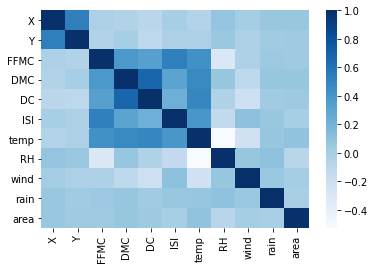

In [44]:
plt.figure(figsize=(6,4))
sns.heatmap(forest_fires_org.corr(), cmap='Blues',annot=False) 

Zmienne są w znacznej większosci słabo skorelowane, oprócz DC i DMC oraz RH i temp\
Przyjrzyjmy się im bliżej

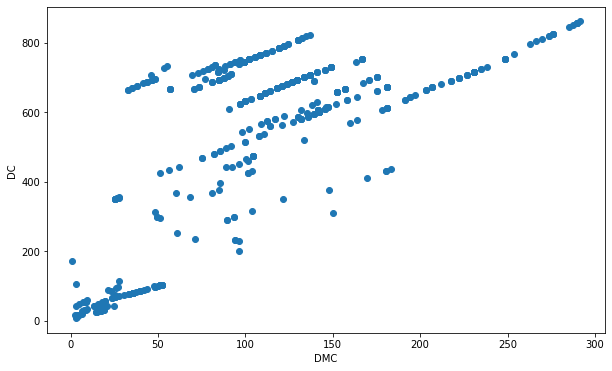

In [61]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(forest_fires["DMC"], forest_fires["DC"])
ax.set_xlabel("DMC")
ax.set_ylabel("DC")
plt.show()

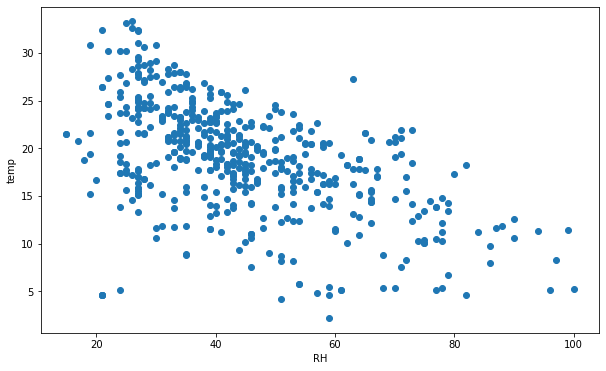

In [63]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(forest_fires["RH"], forest_fires["temp"])
ax.set_xlabel("RH")
ax.set_ylabel("temp")
plt.show()

Ładnie widać tu zależność (zgrubnie) liniową

<AxesSubplot:>

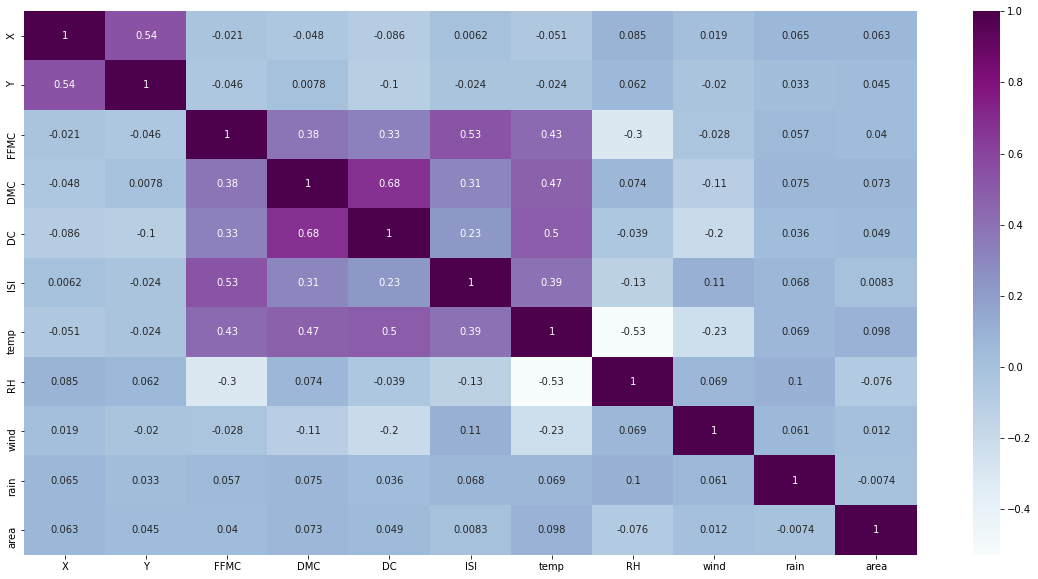

In [45]:
plt.figure(figsize=(20,10))
plot = forest_fires_org.corr()
sns.heatmap(plot, cmap = 'BuPu',annot=True)

### Dalsze badanie danych

Wygenerujmy boxploty, żeby zbadać czy zmienne wykazują outlier'y
Na początku usuńmy moth i day, bo generowanie boxplotu dla tych zmiennych nie ma sensu zbytnio

In [68]:
l = forest_fires_org.columns.values
r = [0,1,4,5,6,7,8,9,10,11,12]
l = l[r]

number_of_columns = 3
number_of_rows = 4

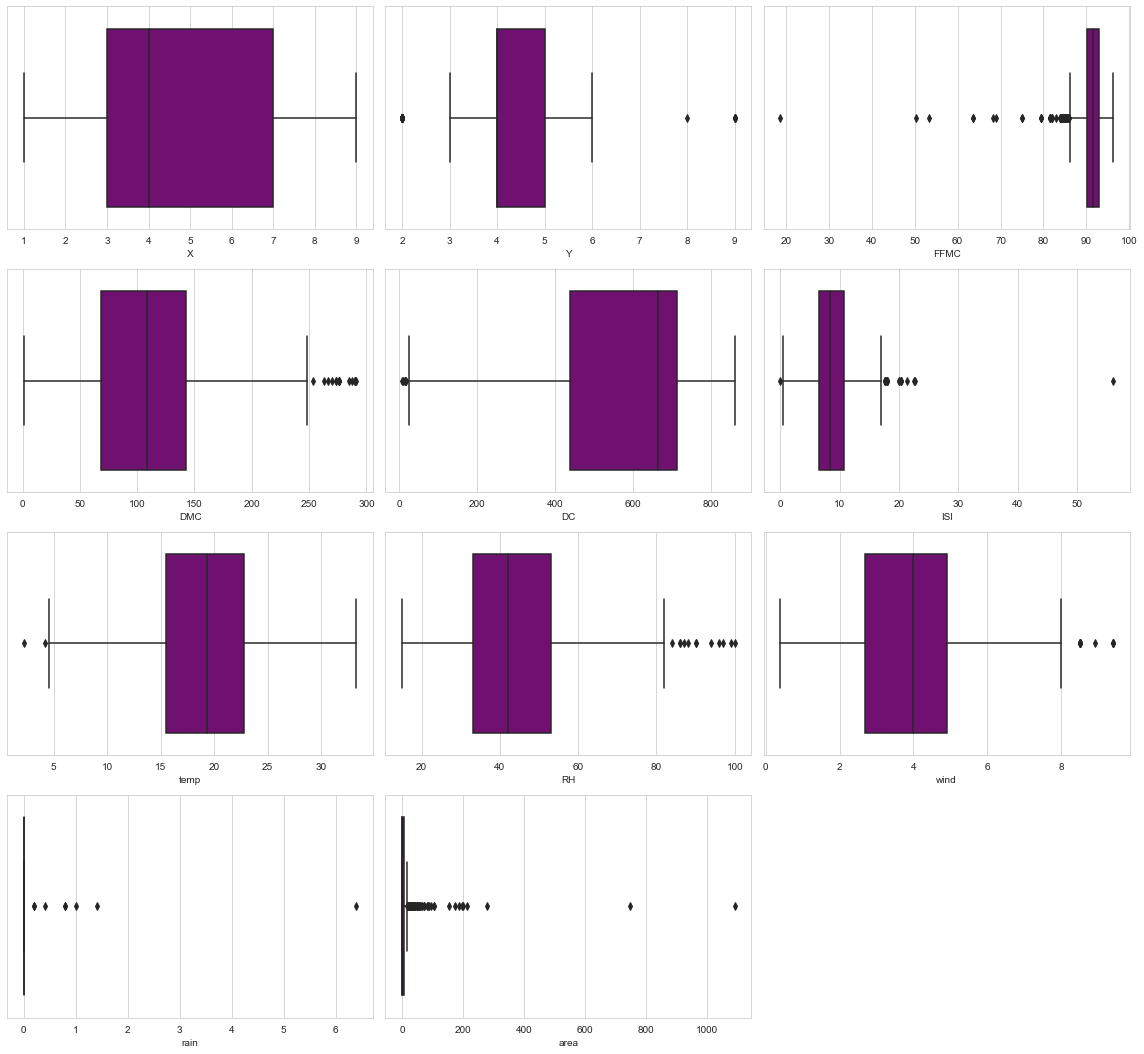

In [71]:
plt.figure(figsize=(16, 18))
for i in range(0, len(l)):
    if l[i] == 'month' or l[i] == 'day':
        continue
    else:
        plt.subplot(number_of_rows + 1, number_of_columns, i+1)
        sns.set_style('whitegrid')
        sns.boxplot(forest_fires_org[l[i]],color='purple', orient='v')
        plt.tight_layout()

Każda zmienna, oprócz X, DC i temp wykazuje outlier'y, szczególnie  area i FFMC

Widzimy też od razu, że sporą częścią rain i area są zera

### Zmienne nie będące liczbą

To, że dni tygodnia i miesiące są typu innego niż liczba stanowi pewną przeszkodę w ich analizie, więc zamieńmy je na cyfry

Zmienianie ich wcześniej nie miało celu, ponieważ są to zmienne cykliczne i mogłaby zajść możliwość wyciągnięcia niewłaściwych wniosków

In [46]:
month = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9,'oct':10, 'nov':11,'dec':12}
forest_fires.month = forest_fires_org.month.map(month)
day = {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5, 'sat':6, 'sun':7}
forest_fires.day = forest_fires_org.day.map(day)

#sprawdźmy czy wszystko się dobrze zmapowało
forest_fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0


### Histogramy

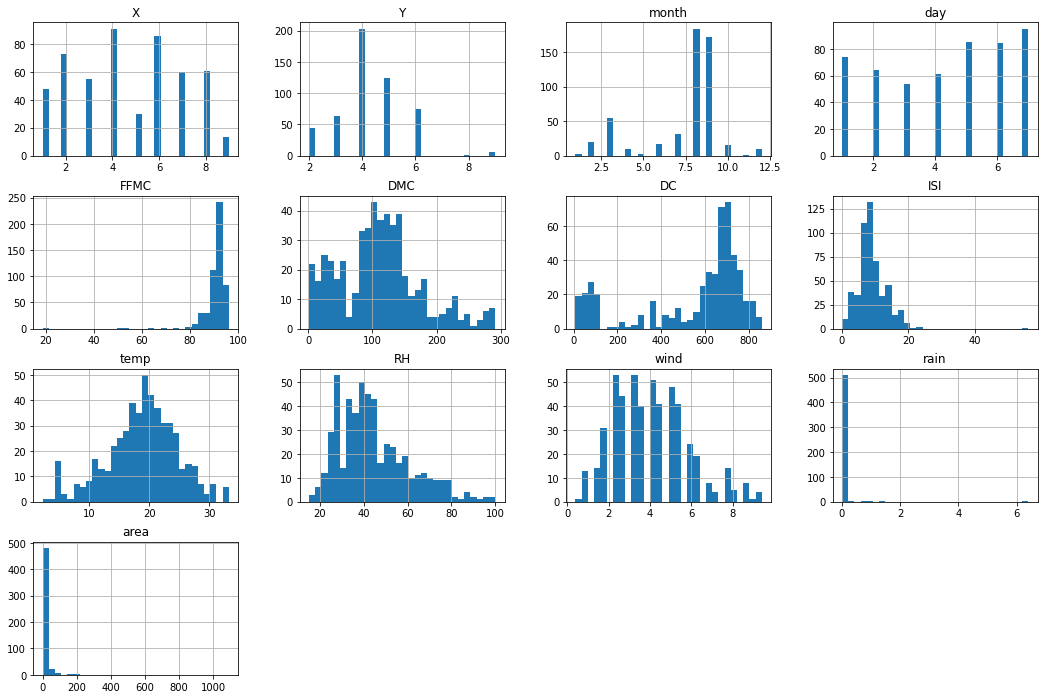

In [47]:
forest_fires.hist(figsize=(18, 12), bins=30)
plt.show()

Troche poderzanie wyglądają dla mnie rain i area, więc przyjrzyjmy się im bliżej za pomocą skali logarytmicznej i określaniu jaką częścią wartości są zera

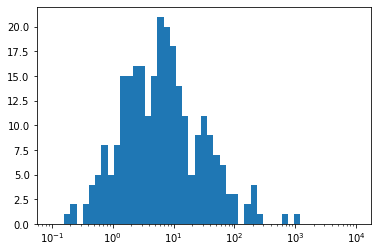

In [66]:
pl.hist(forest_fires['area'], bins=np.logspace(np.log10(0.1), np.log10(10000.0), 50))
pl.gca().set_xscale("log")
pl.show()

Area teraz wygląda dużo lepiej i mniej skośnie :)

Ale trzeba tylko mieć w pamięci, że patrzymy tylko na niezerowe wartości, więc sprawdźmy tylko ile jest zer

In [56]:
forest_fires_area_zeros = forest_fires.loc[forest_fires['area'] == 0]
forest_fires_area_zeros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       247 non-null    int64  
 1   Y       247 non-null    int64  
 2   month   247 non-null    int64  
 3   day     247 non-null    int64  
 4   FFMC    247 non-null    float64
 5   DMC     247 non-null    float64
 6   DC      247 non-null    float64
 7   ISI     247 non-null    float64
 8   temp    247 non-null    float64
 9   RH      247 non-null    float64
 10  wind    247 non-null    float64
 11  rain    247 non-null    float64
 12  area    247 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 27.0 KB


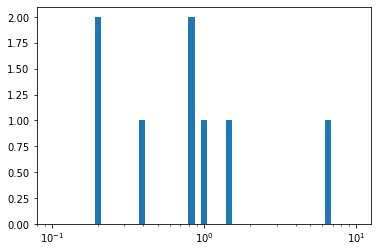

In [58]:
pl.hist(forest_fires['rain'], bins=np.logspace(np.log10(0.1),np.log10(10.0), 50))
pl.gca().set_xscale("log")
pl.show()

Analogicznie sprawdźmy ile tu jest zer

In [59]:
forest_fires_rain_zeros = forest_fires.loc[forest_fires['rain'] == 0]
forest_fires_rain_zeros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       509 non-null    int64  
 1   Y       509 non-null    int64  
 2   month   509 non-null    int64  
 3   day     509 non-null    int64  
 4   FFMC    509 non-null    float64
 5   DMC     509 non-null    float64
 6   DC      509 non-null    float64
 7   ISI     509 non-null    float64
 8   temp    509 non-null    float64
 9   RH      509 non-null    float64
 10  wind    509 non-null    float64
 11  rain    509 non-null    float64
 12  area    509 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 55.7 KB


### Relacje między zmiennymi

Spójrzmy teraz na związki area z innymi zmiennymi za pomoca scatter plotów

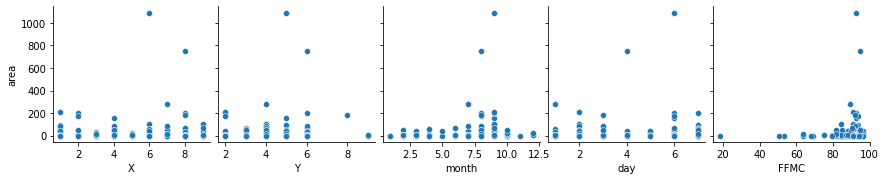

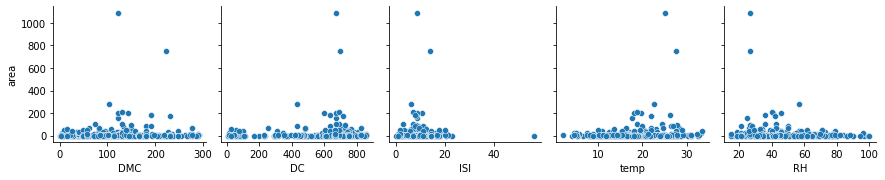

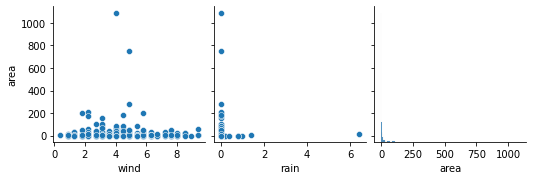

In [48]:
sns.pairplot(forest_fires, y_vars="area", x_vars=forest_fires.columns.values[:5])
sns.pairplot(forest_fires, y_vars="area", x_vars=forest_fires.columns.values[5:10])
sns.pairplot(forest_fires, y_vars="area", x_vars=forest_fires.columns.values[10:])

plt.show()

Bardzo ciężko cokolwiek wywnioskować z takich wykresów, bardzo przeszkadzają outlier-y w area

Spróbujmy więc je odfiltrować wspomagając się wcześniej wygenrerowanymi boxplotami

In [49]:
forest_fires_filtered = forest_fires.loc[forest_fires['area'] < 150]
#porownajmy ile linijek straciliśmy
forest_fires.info()
forest_fires_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    float64
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 52.6 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 508 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       508 non-null    int64  
 1   Y       508 non-null    int64  
 2   month   508 non-null    int64  

Straciliśmy 9 wierszy, więc żeby lepiej przyjrzeć się scaterrom, możemy to tak zostawić

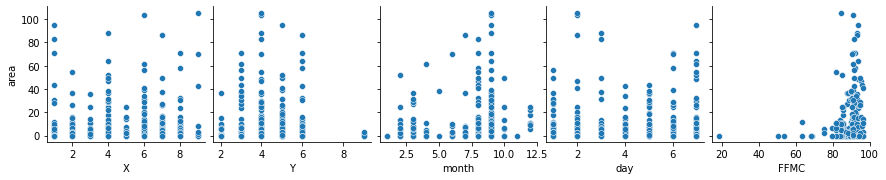

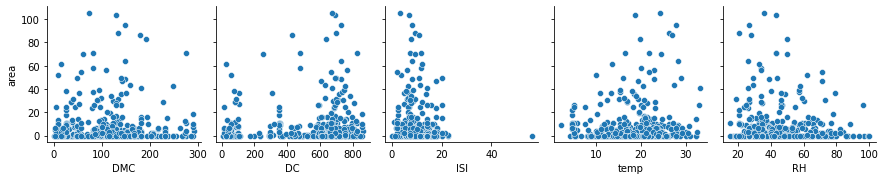

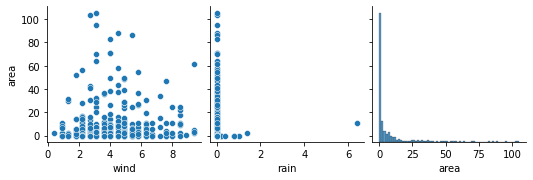

In [50]:
forest_fires_filtered
sns.pairplot(forest_fires_filtered, y_vars="area", x_vars=forest_fires_filtered.columns.values[:5])
sns.pairplot(forest_fires_filtered, y_vars="area", x_vars=forest_fires_filtered.columns.values[5:10])
sns.pairplot(forest_fires_filtered, y_vars="area", x_vars=forest_fires_filtered.columns.values[10:])

plt.show()

Szukamy jakieś zależności liniowej między area a inną zmienną jednak ciężką tu taką odnaleźć

Wstępne wnioski:
* najwięcej i największe pożary są w lato
* najwięcej pożarów jest przy wysokim DC (susza prawdopodobnie) oraz przy wyższych temperaturach
* przy większym wietrze paradoksalnie jest mniej porażaór
* ogromna większość pożarów wystąpiła przy zerowych opadach (raczej logiczne)

### Zmienne X i Y

Trudno zinterpretować zmienne X i Y osobno, jako że to współrzędne, więc tutaj przydatny może się okazać bubble plot (trochę w funkcji mapy) ze zmienną area defiiniującą wielkość "bąbelków"

Zróbmy to zarówno z outlier'ami w area i po ch odfiltrowaniu

Dodatkowo, bedzie konieczne odwrócenie numeracji na osi Y (co jest mocno nieintuicyjne) ale tak właśnie zostało to ponumerowane (ilustracja poniżej)

 ![text](https://images.slideplayer.com/41/11174684/slides/slide_5.jpg)

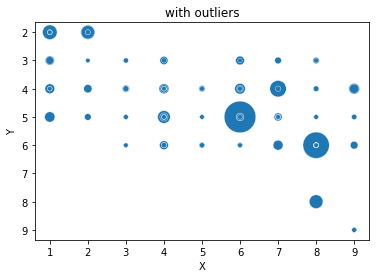

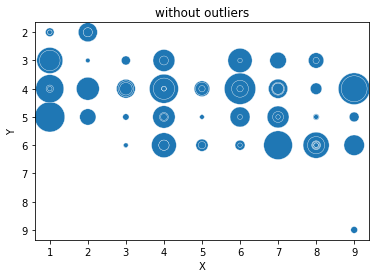

In [82]:
bubble = sns.scatterplot(data=forest_fires, x="X", y="Y", size="area", legend=False, sizes=(20, 1000))
bubble.set_title('with outliers')
bubble.invert_yaxis()
plt.show()

bubble_filtered = sns.scatterplot(data=forest_fires_filtered, x="X", y="Y", size="area", legend=False, sizes=(20, 1000))
bubble_filtered.set_title('without outliers')
bubble_filtered.invert_yaxis()
plt.show()

Jak widać "bąbelki" się na siebie, więc zróbmy średnią dla każdej pary indeksów

In [73]:
areas_df_with=forest_fires.iloc[:,[0,1,12]]
areas_df_with=areas_df_with.groupby(['X','Y'])['area'].mean().reset_index()
areas_df_with.head()

,X,Y,area
0,1,2,11.575789
1,1,3,15.714000
2,1,4,10.018667
3,1,5,28.867500
4,2,2,18.506000


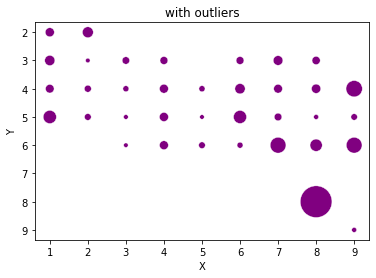

In [83]:
bubble = sns.scatterplot(data=areas_df_with, x="X", y="Y", size="area", legend=False, sizes=(20, 1000), color='purple')
bubble.set_title('with outliers')
bubble.invert_yaxis()
plt.show()

In [75]:
areas_df_without=forest_fires_filtered.iloc[:,[0,1,12]]
areas_df_without=areas_df_without.groupby(['X','Y'])['area'].mean().reset_index()
areas_df_without.head()

,X,Y,area
0,1,2,0.392222
1,1,3,15.714000
2,1,4,10.018667
3,1,5,28.867500
4,2,2,3.786087


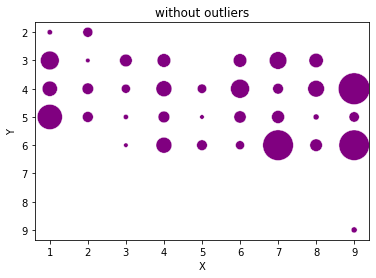

In [85]:
bubble = sns.scatterplot(data=areas_df_without, x="X", y="Y", size="area", legend=False, sizes=(20, 1000), color='purple')
bubble.set_title('without outliers')
bubble.invert_yaxis()
plt.show()

### Pandas Profiling Raport

In [52]:
from pandas_profiling import ProfileReport
prof = ProfileReport(forest_fires_org)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Braki w narzędziu:
* brak skali logarytmicznej przy histogramach area i rain, ktora jednak jest pomocna
* przy barplocie dni tygodnia stworzenie grupy 'other' nie ma sensu bo to nie problem mieć po prostu 7 słupków, zamiast 6ciu
* korelacja X i Y jest niepotrzebna i raczej bezsensowna jako że są to współrzędne
* jest bardzo duzo informacji, niekoniecznie potrzebnych
* dla mnie na przykład nie do końca jest zrozumiały ten barplot z missing values
* narzędzie samo nie odfiltruje outlierów ani nie zamieni zmiennych z typami chacaracter na liczby

Ogólna opinia: przydatne narzędzie, jednak większość roboty w EDA robi za nas, ale powinno być bardziej bazą i wstępem do samej eksploracji niż uznane za wystarczające.